<a href="https://colab.research.google.com/github/nikk-16/Payment-Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps to follow

It is a Binary Classification Problem

- **General Overview:** Have a General Overview of the data
- **EDA:** Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
- **Data Preprocessing:** With the information gained after performing EDA, Preprocess the Data accordingly
- **Model Building:** Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
- **Model Performance:** Assess the Performance of the Model on the Testing data set
- **Predictions:** Make Predictions on the Testing data set

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import pandas as pd
import numpy as np


In [129]:
data = pd.read_csv("/content/drive/MyDrive/Copy of Fraud.csv")

In [130]:
data.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [131]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**So we can remove name origin and destination name as they are also not correlated with the amount and transactions being processed**

In [133]:
data.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

### So there are no null values too here in our dataset, this shows data is all okay and no preprocessing for null values to be done.

In [134]:
# checking if we have all 0s & 1s in our Target Feature and its a binary classification problem
data['isFraud'].unique()

array([0, 1])

In [135]:
# checking if our dataset is balanced or imbalanced

data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

## This shows a Highly imbalanced dataset as fraud transactions are so low. in real scenario it should be, but to manage and pass this in machine learning algorithm we need to have balanced dataset. which is done as we proceed.

In [136]:
# non fradulent transactions are 

100*(6354407/6362620)

99.87091795518198

In [137]:
# fradulent transactions are 

100*(8213/6354407)

0.129248881917699

#### There is almost a 99% - 0.1% distribution of the Target values which seems data is highly unbalanced.

#### Checking for Correlation among the Predictors

##### Correlation Heatmap

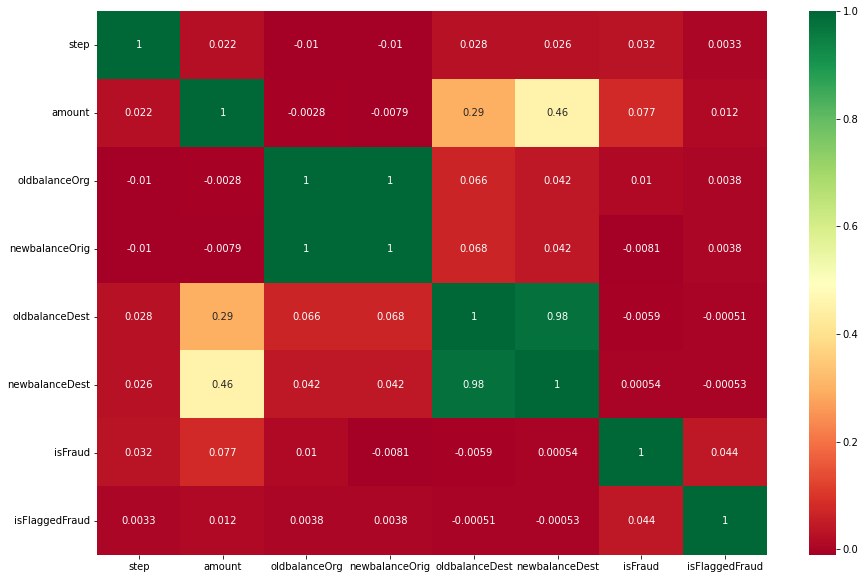

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

## as we see throught this correlation table mapped through seaborn library

1. Input features oldbalanceDest and newbalanceDest are correlated with each other so we had to drop one of the feature. To decide which one to drop amongst them we have to check their correlation with dependent feature (isFraud), oldbalanceDest is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054). here i have to drop the newbalanceDest feature.

2. likewise above oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01). here i have to drop the oldbalanceOrg feature.


So we are dropping newbalanceDest feature and oldbalanceOrg feature.

# EDA and visualization

In [139]:
#### a) Visualizing varibales

# Plotting Bar Graphs in order to visualize to see the distributions

In [140]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


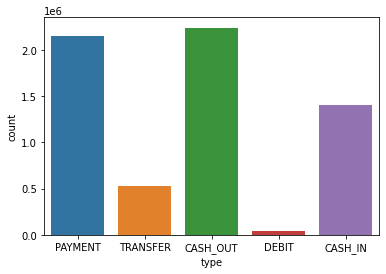

In [141]:
sns.countplot(data['type'])
plt.show()

##Most frequent transactions are cash_in , cash_out and payment... so more likely fraud must be more in them 

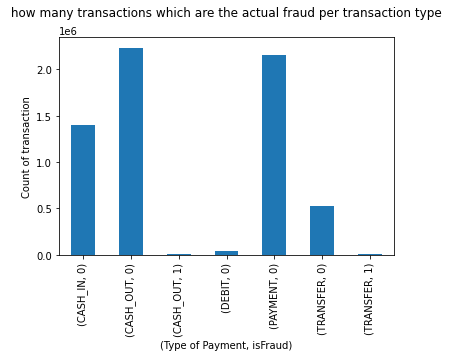

In [142]:
fraud_type = data.groupby(['type', 'isFraud']).size().plot(kind='bar')
fraud_type.set_title(" how many transactions which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")

plt.show()

This shows that fraud transactions are mostly in transfer and cashout

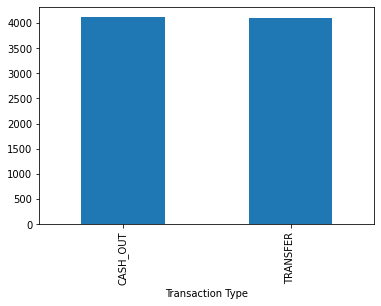

In [143]:
fraud = data['isFraud'].isin([1])

fraud_time = data[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

plt.show()

In [144]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

data['origBalance_inacc'] = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]).astype(int)
data['destBalance_inacc'] = (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(data['origBalance_inacc'].value_counts()[1]/data.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(data['destBalance_inacc'].value_counts()[1]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


In [145]:
print("Number of transactions with amount is equal to 0?")
print(len(data[data.amount==0]))

print("What type of transactions are they?")
print(data[data.amount==0]['type'].value_counts())

print("Are all these marked as Fraud Transactions?")
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])

Number of transactions with amount is equal to 0?
16
What type of transactions are they?
CASH_OUT    16
Name: type, dtype: int64
Are all these marked as Fraud Transactions?


True

#### Checking whether the Falgged transactions are Fraudulent ones or not ?

In [146]:
data_temp = data[data.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(data_temp))

print("What type of transactions are they?")
print("\t",data_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",data_temp['isFraud'].value_counts()[1] == len(data_temp))

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True


All the fraud trnasactions belong to Transfer or Cash-out type, So, iam combinig all the type of payments(PAYMENT, CASH-IN and DEBIT) other than CASH-OUT and TRANSFER as OTHERS.

In [147]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [148]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [149]:
data['type'] = data['type'].map(type_map)

data['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

In [150]:
# deleting the unnecessary features from dataset

X = data.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [151]:
y = data['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

Train - Test split

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [153]:
X_train.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
1186641,OTHERS,186994.49,191974.49,2565463.66,1,1
1199598,CASH_OUT,86377.61,0.00,0.00,1,0
1185636,CASH_OUT,215489.19,0.00,6345756.55,1,1
6211424,TRANSFER,697319.21,0.00,2150239.95,1,0
4452703,OTHERS,59243.58,0.00,0.00,1,1


# Preprocessing 

###One Hot Encoding

In [154]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)

In [155]:
X_train = pd.concat([X_train, dummies_type], axis=1)
X_train = X_train.drop(columns =['type'])
X_train.head()

,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
1186641,186994.49,191974.49,2565463.66,1,1,1,0
1199598,86377.61,0.00,0.00,1,0,0,0
1185636,215489.19,0.00,6345756.55,1,1,0,0
6211424,697319.21,0.00,2150239.95,1,0,0,1
4452703,59243.58,0.00,0.00,1,1,1,0


In [156]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)

In [157]:
X_test = pd.concat([X_test, dummies_type], axis=1)
X_test = X_test.drop(columns =['type'])
X_test.head()

,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
3737323,330218.42,351084.42,452419.57,1,1,1,0
264914,11647.08,18722.92,0.00,0,1,1,0
85647,152264.21,258853.21,201303.01,1,1,1,0
5899326,1551760.63,0.00,3198359.45,1,0,0,1
2544263,78172.30,2999503.88,415821.90,1,1,1,0


In [158]:
(X_train.columns == X_test.columns).all()

True

In [159]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# label = le.fit_transform(X_train['type'])
# X_train['type'] = label
# label = le.fit_transform(X_test['type'])
# X_test['type'] = label
# X_train.head()
# X_test.head()

KeyError: ignored

# Building Model


In [160]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(class_weight="balanced")
lr_model = lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.44482334086628106


### only 45 percent accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


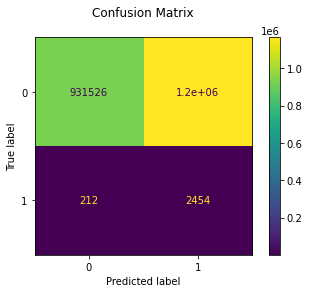

In [161]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [162]:
y_pred = lr_model.predict(X_test)

In [163]:
from sklearn.metrics import classification_report

print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.44      0.62   2096999
           1       0.00      0.92      0.00      2666

    accuracy                           0.44   2099665
   macro avg       0.50      0.68      0.31   2099665
weighted avg       1.00      0.44      0.61   2099665



# Random Forest 

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", n_estimators= 100, min_samples_split = 4, min_samples_leaf = 4, max_leaf_nodes = None, max_depth = None)


In [165]:
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9999895221380554

So this gives accuracy of 99.99 % which is quite good.

In [166]:
y_pred = rf_model.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


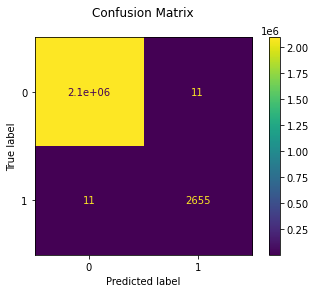

In [167]:
plot_confusion_matrix(rf_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [168]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       1.00      1.00      1.00      2666

    accuracy                           1.00   2099665
   macro avg       1.00      1.00      1.00   2099665
weighted avg       1.00      1.00      1.00   2099665

